In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)

## Carga del Dataset

In [2]:
dataset = pd.read_csv("purchase_dataset.csv")           # Dataset original
predictions = pd.read_csv("purchase_predictions.csv")   # Resultados del modelo

In [3]:
# Variables realies y predictivas
y_true = predictions["true_label"]
y_pred = predictions["pred_label"]

## Calcular métricas de desempeño

In [4]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)

print("Métricas del Modelo de Clasificación")
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1-Score  : {f1:.2f}")

Métricas del Modelo de Clasificación
Accuracy  : 1.00
Precision : 1.00
Recall    : 1.00
F1-Score  : 1.00


## Gráficos Generados

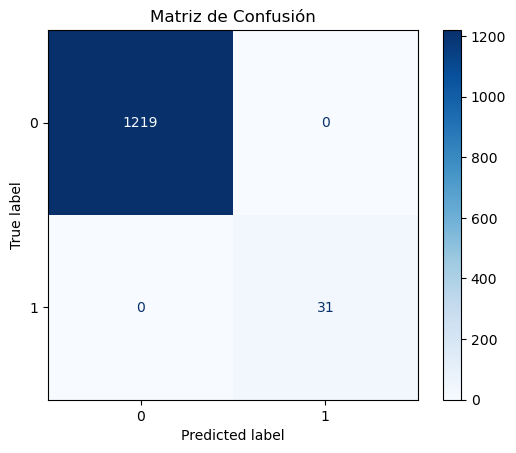

In [5]:
# (a) Matriz de Confusión
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

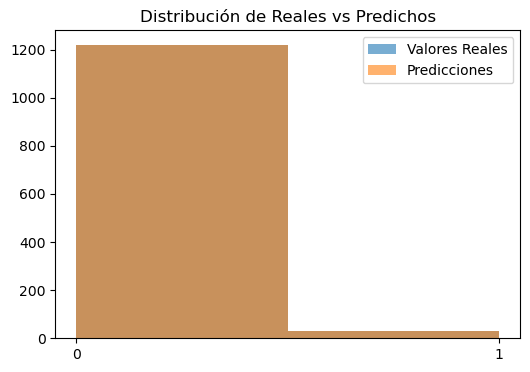

In [6]:
# (b) Distribución de valores reales vs predichos
plt.figure(figsize=(6,4))
plt.hist(y_true, bins=2, alpha=0.6, label="Valores Reales")
plt.hist(y_pred, bins=2, alpha=0.6, label="Predicciones")
plt.xticks([0,1])
plt.legend()
plt.title("Distribución de Reales vs Predichos")
plt.show()

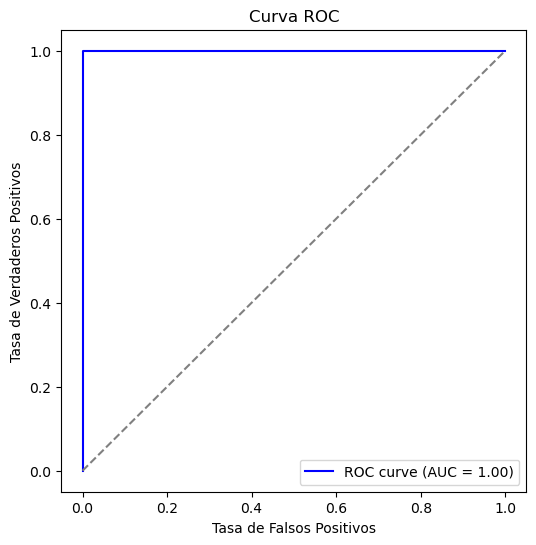

In [7]:
# (c) Curva ROC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], color="gray", linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()